In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#2. Load the dataset

In [40]:
h=pd.read_csv("Mall_Customers.csv")
h

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#3. Perform Below Visualizations

#a) Univariate Analysis

C:\Users\Warrior\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

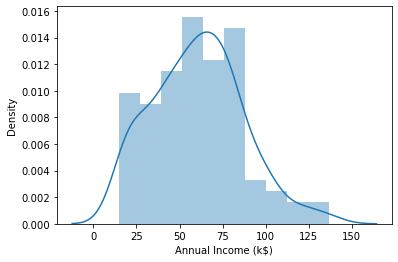

In [41]:
sns.distplot(h['Annual Income (k$)'])

#b) Bi - Variate Analysis

C:\Users\Warrior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

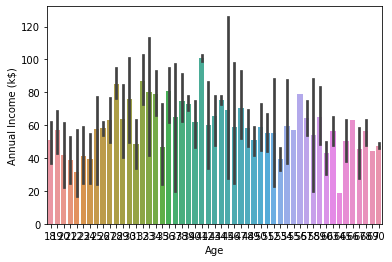

In [24]:
sns.barplot(h['Age'],h['Annual Income (k$)'])

#c)Multi - Variate Analysis

C:\Users\Warrior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

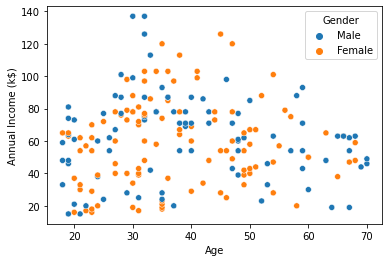

In [25]:
sns.scatterplot(h['Age'],h['Annual Income (k$)'],h['Gender'])

#4. Perform descriptive statistics on the dataset

In [26]:
h.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#5. Check for Missing values and deal with them.

In [27]:
h.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#6. Find the outliers and replace them outliers

C:\Users\Warrior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

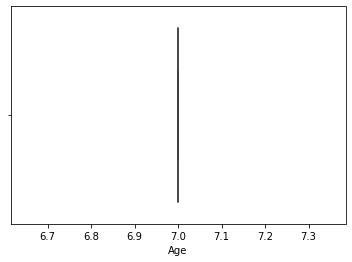

In [46]:
sns.boxplot(h['Age'])

In [29]:
q=h.quantile([0.85,0.65])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.85,170.15,54.15,87.0,79.30
0.65,130.35,44.00,71.0,58.35


In [57]:
iqr=q.iloc[0]-q.iloc[1]
iqr

CustomerID                39.80
Age                       10.15
Annual Income (k$)         0.00
Spending Score (1-100)     0.00
dtype: float64

In [58]:
u=q.iloc[0]+(1.5*iqr)
u

CustomerID                229.850
Age                        69.375
Annual Income (k$)          7.000
Spending Score (1-100)      7.000
dtype: float64

In [59]:
l=q.iloc[1]-(1.5*iqr)
l

CustomerID                70.650
Age                       28.775
Annual Income (k$)         7.000
Spending Score (1-100)     7.000
dtype: float64

C:\Users\Warrior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

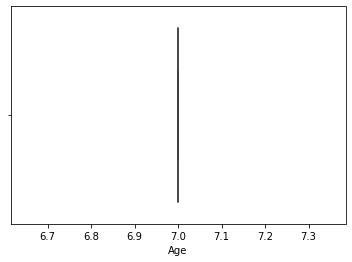

In [45]:
h['Age']=np.where(h['Age']>10,7,h['Age'])
sns.boxplot(h['Age'])

#7. Check for Categorical columns and perform encoding.

In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
l=LabelEncoder()
o=OneHotEncoder()
h['Gender']=l.fit_transform(h['Gender'])
h.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,7,15,39
1,2,1,7,15,81
2,3,0,7,16,6
3,4,0,7,16,77
4,5,0,7,17,40


#8. Scaling the data

In [11]:
x=h.drop('Annual Income (k$)',axis=1)
y=h['Annual Income (k$)']
x

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,7,39
1,2,1,7,81
2,3,0,7,6
3,4,0,7,77
4,5,0,7,40
...,...,...,...,...
195,196,0,7,79
196,197,0,7,28
197,198,1,7,74
198,199,1,7,18


In [12]:
y

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=StandardScaler()
x_scale=s.fit_transform(x)
x_scale

NameError: name 'x' is not defined

#9. Perform any of the clustering algorithms

In [14]:
from sklearn.cluster import MiniBatchKMeans
km=MiniBatchKMeans()
cluster=km.fit_predict(x_scale)
cluster

C:\Users\Kumarappan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([1, 1, 5, 7, 5, 7, 5, 7, 1, 7, 1, 7, 5, 7, 1, 1, 5, 1, 1, 7, 1, 1,
       5, 1, 5, 1, 5, 1, 5, 7, 1, 7, 1, 1, 5, 7, 5, 7, 5, 7, 5, 1, 1, 7,
       5, 7, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 6, 0, 3, 4, 6, 4, 6, 4, 6,
       0, 3, 4, 3, 0, 6, 4, 3, 0, 6, 0, 3, 4, 6, 4, 3, 0, 6, 4, 6, 0, 3,
       0, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 0, 6, 4, 6, 4, 6, 0, 3,
       4, 6, 4, 6, 0, 3, 4, 3, 0, 6, 0, 6, 0, 3, 0, 3, 4, 3, 0, 3, 0, 6,
       4, 6])

#10. Add the cluster data with the primary dataset

In [47]:
h.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [49]:
h1=pd.DataFrame(x_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
h1.head()

NameError: name 'x_scale' is not defined

In [52]:
h1['kmeans cluster']=pd.Series(cluster)
h1.head()

NameError: name 'cluster' is not defined

#11. Split the data into dependent and independent variables.

In [35]:
x=h1.iloc[:,0:4]
x

NameError: name 'h1' is not defined

In [34]:
y=h1['kmeans cluster']
y

NameError: name 'h1' is not defined

#12. Split the data into training and testing

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=1)

#13. Build the Model

#14. Train the Model

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

#15. Test the Model

In [89]:
pred_test=lr.predict(x_test)
pred_test

array([0, 0, 0, 7, 4, 1, 7, 0, 0, 4, 1, 3, 0, 0, 7, 4, 4, 0, 4, 3, 3, 0,
       0, 0, 0, 7, 0, 0, 4, 3, 0, 4, 4, 1, 1, 0, 4, 0, 0, 6, 7, 7, 4, 3,
       0, 0, 4, 0, 1, 4, 7, 7, 4, 3, 3, 1, 4, 4, 1, 6], dtype=int32)

In [90]:
y_test

58     0
40     0
34     0
102    7
184    4
198    1
95     7
4      0
29     0
168    4
171    1
18     3
11     0
89     0
110    7
118    4
159    4
35     0
136    4
59     3
51     3
16     0
44     0
94     0
31     0
162    7
38     0
28     0
193    4
27     3
47     0
165    4
194    4
177    1
176    1
97     0
174    4
73     0
69     0
172    6
108    7
107    7
189    4
14     3
56     0
19     0
114    4
39     0
185    1
124    4
98     7
123    7
119    4
53     3
33     3
179    1
181    4
106    4
199    1
138    6
Name: kmeans cluster, dtype: int32

#16. Measure the performance using Evaluation Metrics.

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,y_test)

1.0